<a href="https://colab.research.google.com/github/prateeksingh2001/Plant_Disease_Prediction_Web_App-using-CNN-Deeplearning-Streamlit/blob/main/Testing_Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/

'Advanced Algorithm Lab Work (1).gdoc'
'Advanced Algorithm Lab Work.gdoc'
'AI-Based Code Generation and Bug Fixing: Evaluating tools like GitHub Copilot for software development.gslides'
'AI-Based Code Generation and Bug Fixing .gdoc'
 assign_1.gsheet
 assignment.pdf
 Classroom
'Colab Notebooks'
'DAA - Lab Assignment 03 (1).gdoc'
 Data.gsheet
 datasets
 Distributed_System.pptx
 DRML_Assignment1_Report.gdoc
 DRML_Assignment2_Report.gdoc
'Hopcroft-karp algorithm.gdoc'
'IMG-20250109-WA0000 (1).jpg'
 IMG-20250109-WA0000.jpg
 Iris.csv
 Kaggle_API
'Perceptron & ANN.pptx'
 prateek.gdoc
 svm.ipynb
 trained_model.keras
 training_hist.json
'Untitled document - Bar chart 1.gsheet'
'Untitled presentation (1).gslides'
'Untitled presentation (2).gslides'
'Untitled presentation (3).gslides'
'Untitled presentation.gslides'


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:20<00:00, 105MB/s] 
100% 2.70G/2.70G [00:20<00:00, 138MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip -d plant_diseases_dataset

Streaming output truncated to the last 5000 lines.
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c

In [ ]:
!ls

drive  new-plant-diseases-dataset.zip  plant_diseases_dataset  sample_data


In [ ]:
!ls plant_diseases_dataset

'new plant diseases dataset(augmented)'  'New Plant Diseases Dataset(Augmented)'   test


In [ ]:
!ls 'plant_diseases_dataset/test'

test


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_dir = "plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [ ]:
model_path = '/content/drive/MyDrive/trained_model.keras'

In [ ]:
cnn = load_model(model_path)

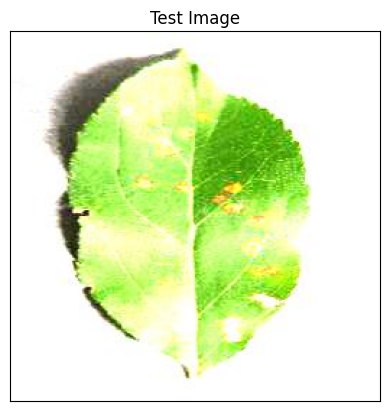

In [ ]:
import cv2
image_path = '/content/plant_diseases_dataset/test/test/AppleCedarRust1.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
print(predictions)

[[5.6684724e-13 2.9327252e-14 1.0000000e+00 1.7297568e-16 1.3175797e-12
  1.3886468e-10 2.4196354e-16 5.9574714e-13 1.8014235e-15 3.5358652e-16
  2.4861398e-17 1.8064765e-13 1.0159847e-14 8.5692603e-16 2.4676797e-15
  1.3474939e-11 3.1007523e-12 5.6157813e-14 2.3314102e-12 4.0297951e-10
  1.5368110e-13 2.0894222e-14 6.0203395e-14 4.8502557e-14 6.8136799e-18
  4.3979742e-15 1.5180630e-14 1.6164251e-15 1.0294506e-09 5.2123840e-11
  2.1846573e-09 1.9613575e-16 1.5150822e-12 3.6411003e-15 1.2283220e-10
  9.0976879e-13 3.7545397e-11 2.4642677e-13]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


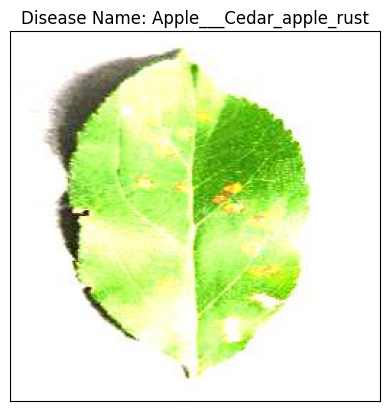

In [ ]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()